## Darwin Project Plotting + Visualization
####  Jeff Valentic | valen136@msu.edu
####  4/16/2020

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from statistics import mean
import random
#pop_A0, size_A0, speed_A0, pop_B0, size_B0, speed_B0

In [3]:
df = pd.read_excel('Darwin_Data_2500.xlsx', unpack=True)

In [35]:
print(mean(df['B Speed']))
print(mean(df['B Size']))
print(mean(df['A Speed']))
print(mean(df['A Size']))

3.73676405216474
2.1806771522995883
1.393469607084679
5.58255803338512


In [32]:
columns = ['B Population']
df_survived = df.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0).astype(float)
#print(df_survived)

In [6]:
pop_A0 = df_survived["A Population"]
size_A0 = df_survived["A Size"]
speed_A0 = df_survived["A Speed"]
pop_B0 = df_survived["B Population"]
size_B0 = df_survived["B Size"]
speed_B0 = df_survived["B Speed"]

print(len(pop_B0))
print(len(pop_A0))

1652
1652


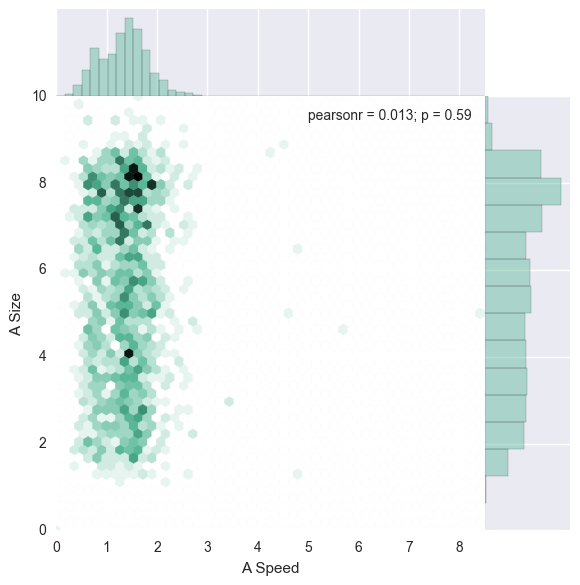

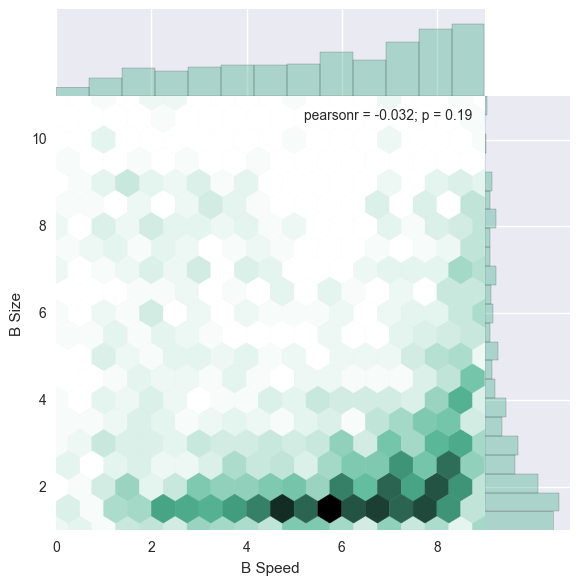

In [7]:
#sns.set_style()

plot1 = sns.jointplot(speed_A0,size_A0, kind='hex', space=0, color="#4CB391")
plot2 = sns.jointplot(speed_B0,size_B0, kind="hex", space=0, color="#4CB391")


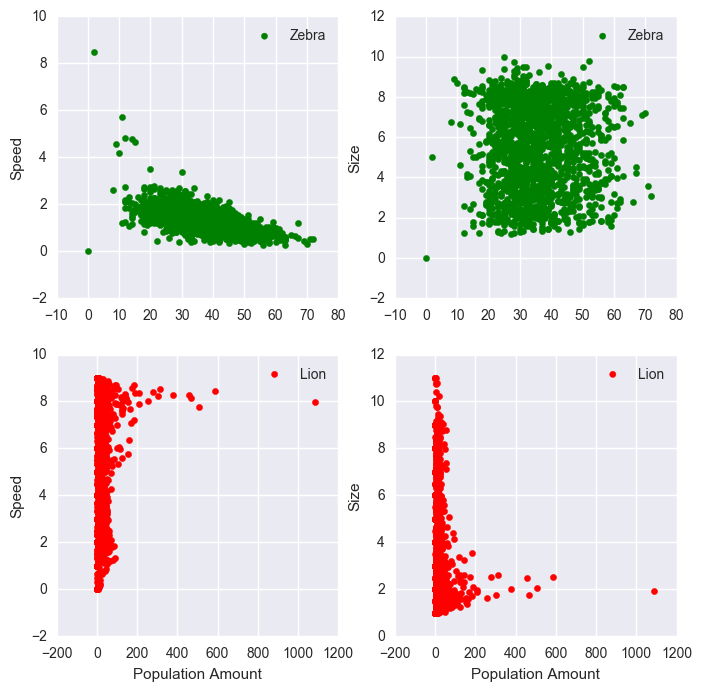

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.scatter(pop_A0, speed_A0, color='green', label='Zebra')
plt.ylabel("Speed")
plt.legend()

plt.subplot(222)
plt.scatter(pop_A0, size_A0, color='green', label='Zebra')
plt.ylabel("Size")
plt.legend()

plt.subplot(223)
plt.scatter(pop_B0, speed_B0, color='red', label='Lion')
plt.ylabel("Speed")
plt.xlabel("Population Amount")
plt.legend()

plt.subplot(224)
plt.scatter(pop_B0, size_B0, color='red', label='Lion')
plt.ylabel("Size")
plt.xlabel("Population Amount")
plt.legend()

(0, 80)

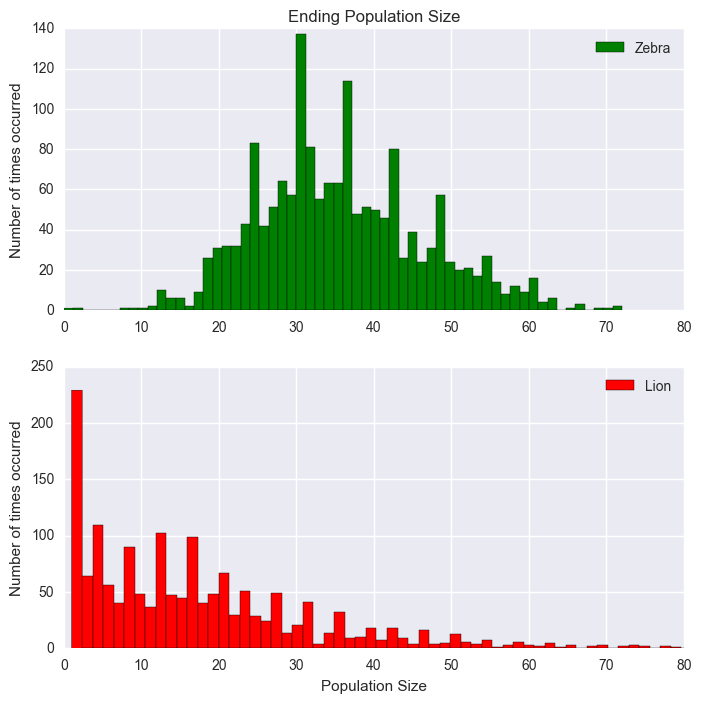

In [9]:
#histogram of ending population amounts
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.hist(pop_A0, color='green', bins=60, label="Zebra")
plt.title("Ending Population Size")
plt.ylabel("Number of times occurred")
plt.legend()

plt.subplot(212)
plt.hist(pop_B0, color='red', bins=800, label="Lion")
plt.xlabel("Population Size")
plt.ylabel("Number of times occurred")
plt.legend()
plt.xlim(0,80)

Average Ratio:  6.4983411132712625


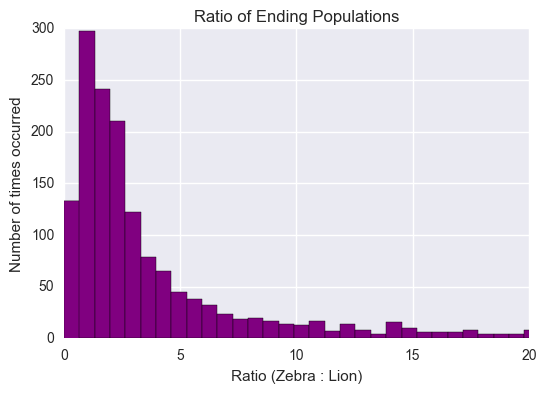

In [16]:
population_ratios = []
A_vals = []
B_vals = []
ratio = 0
for i in pop_A0:
    A_vals.append(i)
    
for i in pop_B0:
    B_vals.append(i)

for i in range(len(A_vals)):
    ratio = (A_vals[i]) / (B_vals[i])
    population_ratios.append(ratio)

#print(population_ratios)

plt.hist(population_ratios, color='purple', bins=100)
plt.xlim(0,20)
plt.title("Ratio of Ending Populations")
plt.xlabel("Ratio (Zebra : Lion)")
plt.ylabel("Number of times occurred")

print("Average Ratio: ", mean(population_ratios))

In [17]:
loc_data = pd.read_excel('single_sample_data/location_data.xlsx', unpack=True)
Ax = loc_data['Ax Loc']
Ay = loc_data['Ay Loc']

Bx = loc_data['Bx Loc']
By = loc_data['By Loc']

#x = x[1:-1]
#x = x.split(', ')
#x.strip('[')

for i in range(len(Ax)):
    Ax[i] = Ax[i][1:-1]
    Ax[i] = Ax[i].split(', ')
    for x in range(len(Ax[i])):
        Ax[i][x] = int(Ax[i][x])

for i in range(len(Ay)):
    Ay[i] = Ay[i][1:-1]
    Ay[i] = Ay[i].split(', ')
    for y in range(len(Ay[i])):
        Ay[i][y] = int(Ay[i][y])        
        
        
for i in range(len(Bx)):
    Bx[i] = Bx[i][1:-1]
    Bx[i] = Bx[i].split(', ')
    for x in range(len(Bx[i])):
        Bx[i][x] = int(Bx[i][x])

for i in range(len(By)):
    By[i] = By[i][1:-1]
    By[i] = By[i].split(', ')
    for y in range(len(By[i])):
        By[i][y] = int(By[i][y]) 

for i in range(len(Ax)):
    plt.figure()
    plt.scatter(Ax[i], Ay[i], color='green')
    plt.scatter(Bx[i], By[i], color='red')
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("Creature Positions")
    
    file_name = "locations_{}.png".format(i)
    plt.savefig(file_name)
    plt.close()

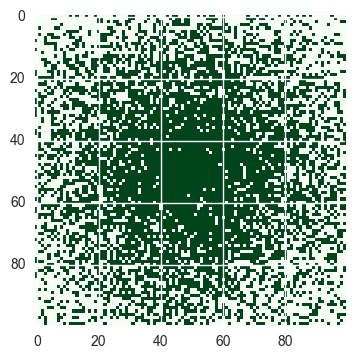

In [28]:
def new_food_map_centerfil(dimensions):
    food_grid = np.zeros( (dimensions,dimensions) )
    x, y = np.meshgrid(np.linspace(-1,1,dimensions), np.linspace(-1,1,dimensions))
    d = np.sqrt(x*x+y*y)
    sigma, mu = 1.0, 0.0
    chance_map = np.exp(-( (d-mu)**2 / ( 1 * sigma**2 ) ) )
    for x in range(dimensions):
        for y in range(dimensions):
            if random.random() < chance_map[x][y]:
                food_grid[x][y] = 1
            
    return food_grid

x = new_food_map_centerfil(100)
plt.imshow(x, cmap='Greens', interpolation='nearest')
plt.show()

In [ ]:
#149